In [1]:
import pandas as pd 

In [2]:
df = pd.read_csv('./dados/imdb-reviews-pt-br.csv')

In [3]:
df.head()

,id,text_en,text_pt,sentiment
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [5]:
SEED = 42

In [6]:
X_train, X_test, y_train, y_test = train_test_split(df['text_pt'], df['sentiment'], random_state = SEED)
model_LogisticRegression = LogisticRegression()
model_LogisticRegression.fit(X_train, y_train)

ValueError: could not convert string to float: 'Embora o filme tenha sido apenas assim, o closed caption foi de longe o melhor que eu já vi! Na maioria das vezes, a ortografia é terrível e a legenda está fora de sincronia. Eu uso o closed captioning mesmo que eu possa ouvir bem, mas acho que muitos atores resmungam. Também muitas vezes a trilha sonora substitui o diálogo. Obrigado!'

In [7]:
print('Negativa \n')
print(df.text_pt[100])

Negativa 

Imagine cada clichê estereotipado e exagerado de todos os filmes e programas de TV nas ruas de Brooklyn entre 1930 e 1980. Preencha-o com um elenco de caricaturas intercambiáveis ​​em vez de personagens reais. Acrescente uma mistura de músicas de "período" e guitarras elétricas lamentáveis ​​durante as cenas "estrondosas". Em seguida, passe o tempo tentando descobrir ou importar qual dos Deuces vai ser morto no estrondo final anticlímax.Eu vou dar este filme aponta para não ser apenas mais uma comédia romântica, teen slasher, filme de ação explosivo, comédia de sexo adolescente, infantil musical, ou veículo de indicação ao Oscar. Mas trazer algo novo ou interessante para o gênero da tragédia das gangues de rua pode ter sido bom.


In [8]:
print('Positiva \n')
print(df.text_pt[40002])

Positiva 

Parece que deveria ser uma biografia de Claude Monet, mas na verdade é uma história altamente focada de relacionamentos entre três garotas adolescentes em uma equipe francesa de nado sincronizado. Não há pais ou professores para falar, nenhuma escola, e meninos são representados por uma figura periférica, o huno François, que entra na história determinado de tempos em tempos e sempre deixa confuso. Paul Aquart é o mais novo dos três, apenas aspirante. para se juntar ao time que ela tanto admira. Ela está parecendo estranha. Ela ainda não saiu do seu crescimento adolescente e tem membros longos e magros, pés grandes e nada de que falar. Ela é prognata e ostenta esses lábios gordos e franzidos. Depois de um tempo, sua aparência cresce em você e, de certos ângulos, ela pode parecer cativante. Adele Haenel é mais velha - mais, mais desenvolvida fisicamente. Que figura glamourosa ela corta seu traje de banho, passeando, provocando os garotos, balançando os longos cabelos loiros. 

In [9]:
df.sentiment.value_counts()

neg    24765
pos    24694
Name: sentiment, dtype: int64

In [10]:
df.sentiment = df.sentiment.replace({'neg':0, 'pos':1})
df.head()

,id,text_en,text_pt,sentiment
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",0
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,0
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",0
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,0
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,0


Corpus textual é o conjunto de dados de todos os textos

# Criação de vocabulário

In [11]:
from sklearn.feature_extraction.text import CountVectorizer

In [12]:
texto = ["Assisti um filme ótimo", "Assisti um filme ruim"]

vectorizer = CountVectorizer(lowercase=False)
bag_of_words = vectorizer.fit_transform(texto)


vectorizer.get_feature_names_out()
vector_texto = pd.DataFrame(bag_of_words.toarray(), columns = vectorizer.get_feature_names_out())
vector_texto

,Assisti,filme,ruim,um,ótimo
0,1,1,0,1,1
1,1,1,1,1,0


In [13]:
vectorizer = CountVectorizer(lowercase=False, max_features=50)
bag_of_words = vectorizer.fit_transform(df.text_pt)
vector_texto = pd.DataFrame(bag_of_words.toarray(), columns = vectorizer.get_feature_names_out())
vector_texto

,Eu,ao,apenas,as,com,como,da,de,do,dos,...,seu,sobre,sua,são,também,tem,tão,um,uma,você
0,0,1,0,0,2,1,0,4,4,2,...,1,1,0,0,0,1,0,3,2,0
1,0,0,0,0,2,0,0,7,1,2,...,1,0,0,2,0,1,0,4,2,1
2,1,0,0,0,3,1,0,10,2,0,...,0,0,0,3,1,0,1,3,2,2
3,2,0,1,4,7,2,1,13,3,1,...,0,0,0,1,0,1,0,7,4,1
4,0,0,1,2,3,0,1,16,2,1,...,0,0,0,4,0,0,0,3,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49454,0,2,0,0,0,1,1,5,1,0,...,0,0,1,0,0,0,0,2,1,0
49455,0,0,1,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,1,1,0
49456,1,0,0,1,3,8,1,14,8,4,...,1,0,1,4,0,1,1,12,3,2
49457,1,0,0,2,2,1,1,5,1,2,...,0,0,0,0,3,0,0,4,1,2


In [15]:
X_train, X_test, y_train, y_test = train_test_split(vector_texto, df.sentiment, random_state = SEED)
model_LogisticRegression = LogisticRegression()
model_LogisticRegression.fit(X_train, y_train)

LogisticRegression()

In [16]:
model_LogisticRegression.score(X_test, y_test)

0.6583097452486858

In [17]:
def classificar_texto(texto, coluna_texto, coluna_classificacao):
    vectorizer = CountVectorizer(lowercase=False, max_features=50)
    bag_of_words = vectorizer.fit_transform(texto[coluna_texto])
    
    vector_texto = pd.DataFrame(bag_of_words.toarray(), columns = vectorizer.get_feature_names_out())
    
    X_train, X_test, y_train, y_test = train_test_split(vector_texto, texto[coluna_classificacao], random_state = SEED)
    
    return model_LogisticRegression.score(X_test, y_test)

In [18]:
classificar_texto(df, 'text_pt', 'sentiment')

0.6583097452486858

# Criação de WordCloud geral

In [19]:
%matplotlib inline

from wordcloud import WordCloud

In [20]:
all_words = ' '.join([text for text in df.text_pt])
word_cloud = WordCloud().generate(all_words)

In [22]:
import matplotlib.pyplot as plt

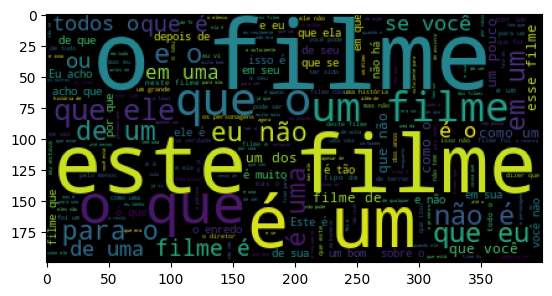

In [23]:
plt.figure()
plt.imshow(word_cloud)
plt.show()

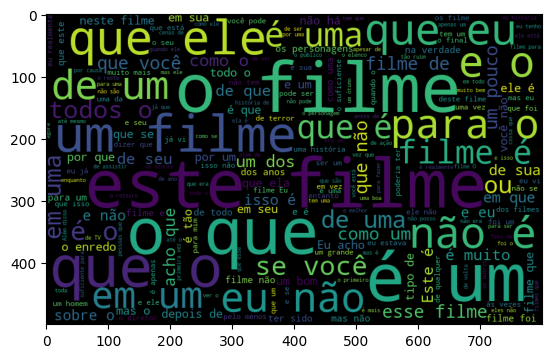

In [24]:
word_cloud = WordCloud(width=800, height=500,
                       max_font_size=110).generate(all_words)

plt.figure()
plt.imshow(word_cloud)
plt.show()

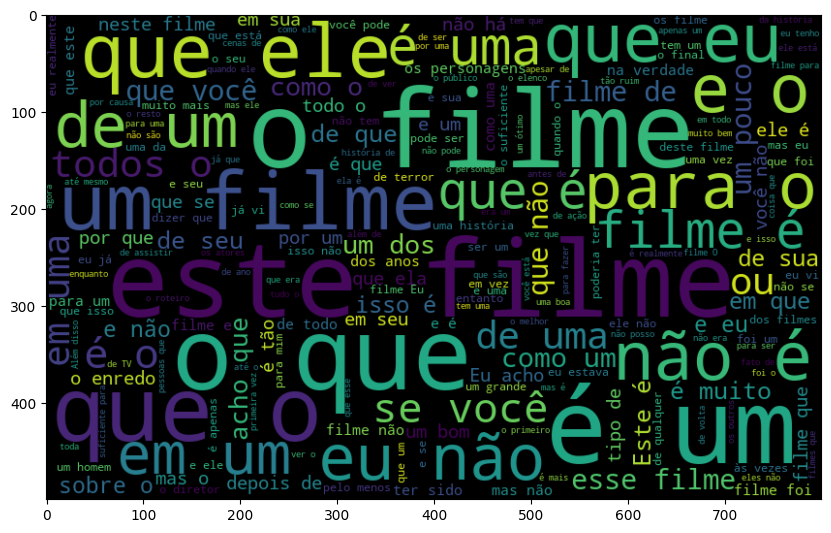

In [25]:
plt.figure(figsize=(10, 7))
plt.imshow(word_cloud, interpolation='bilinear')
plt.show()

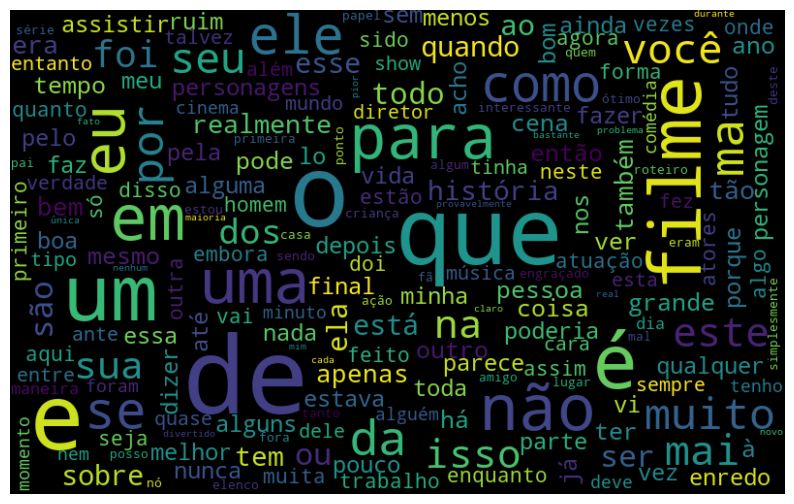

In [26]:
word_cloud = WordCloud(width=800, height=500,
                       max_font_size=110, 
                       collocations=False).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Criação de WordCloud positiva

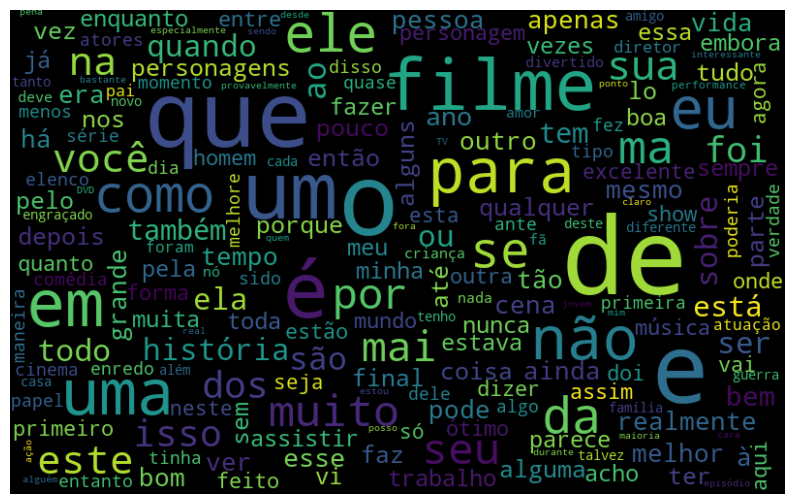

In [27]:
all_words_positive = ' '.join([text for text in df.loc[df.sentiment == 1].text_pt])


word_cloud = WordCloud(width=800, height=500,
                       max_font_size=110, 
                       collocations=False).generate(all_words_positive)

plt.figure(figsize=(10, 7))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Criação de WordCloud negativa

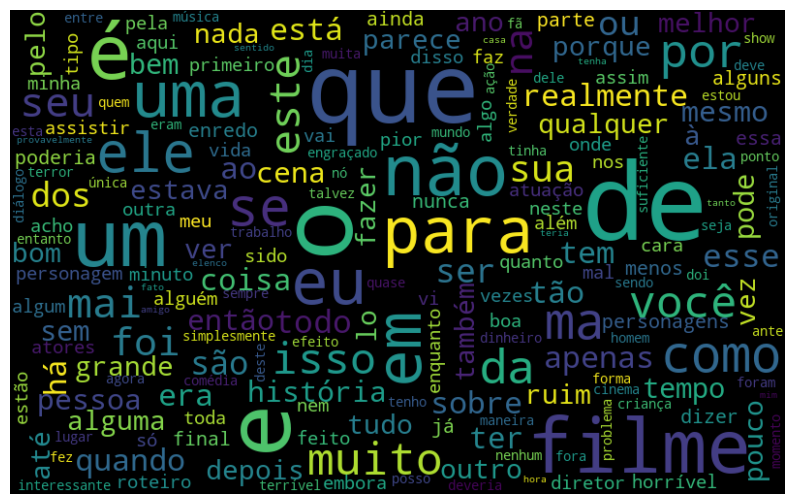

In [28]:
all_words_negative = ' '.join([text for text in df.loc[df.sentiment == 0].text_pt])


word_cloud = WordCloud(width=800, height=500,
                       max_font_size=110, 
                       collocations=False).generate(all_words_negative)

plt.figure(figsize=(10, 7))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()